# PRACTICAL 1 (1a, 1b)

In [ ]:
#Practical 1: Document indexing and Retrieval

#1a implement an inverted index construction algorithm

# Corpus of documents
Doc1 = "new home sales top forecasts"
Doc2 = "home sales rise in july"
Doc3 = "increase in home sales in july"
Doc4 = "july new home sales rise"

Docs = [Doc1, Doc2, Doc3, Doc4]
for Doc in Docs:
    print(Doc)

# Getting unique terms in the documents
unique_terms = set()

for doc in Docs:
    for term in doc.split():
        unique_terms.add(term)

print(unique_terms)

# Creating inverted index in the form of a dictionary
inverted_index = {}

for i, doc in enumerate(Docs):
    for term in doc.split():
        if term in inverted_index:
            inverted_index[term].add(i)
        else:
            inverted_index[term] = {i}

print('the inverted index is ===================')
print(inverted_index)

# Posting list for the term "july"
posting_list = inverted_index.get('july', set())
print('posting list ====================')
print(posting_list)


new home sales top forecasts
home sales rise in july
increase in home sales in july
july new home sales rise
{'increase', 'sales', 'in', 'home', 'rise', 'top', 'new', 'july', 'forecasts'}
the inverted index is ===================
{'new': {0, 3}, 'home': {0, 1, 2, 3}, 'sales': {0, 1, 2, 3}, 'top': {0}, 'forecasts': {0}, 'rise': {1, 3}, 'in': {1, 2}, 'july': {1, 2, 3}, 'increase': {2}}
posting list ====================
{1, 2, 3}


In [ ]:
#1b Build a simple document retrieval system using the constructed index.

import re
from collections import defaultdict

class DocumentRetrievalSystem:
    def __init__(self):
        self.index = defaultdict(list)

    def index_doc(self, did, text):
        words = re.findall(r'\b\w+\b', text.lower())
        words = set(words)
        for word in words:
            self.index[word].append(did)

    def search(self, query):
        q_terms = re.findall(r'\b\w+\b', query.lower())
        result_docs = set()

        for t in q_terms:
            if t in self.index:
                result_docs.update(self.index[t])

        return list(result_docs)


drs = DocumentRetrievalSystem()
drs.index_doc(1, 'This is the first document')
drs.index_doc(2, 'This is the second Document')
drs.index_doc(3, 'This is the third DOCUMENT')

query = 'document'
result = drs.search(query)

print(query)
print(result)


document
[1, 2, 3]


# PRACTICAL 2 (2a, 2b)

In [ ]:
#Practical 2: Retrieval Models

#2a Implement the Boolean retrieval model and process queries.

import re
from collections import defaultdict

class BooleanRetrievalSystem:
    def __init__(self):
        self.index = defaultdict(list)

    def index_doc(self, did, text):
        words = re.findall(r'\b\w+\b', text.lower())
        words = set(words)
        for word in words:
            self.index[word].append(did)

    def search(self, query):
        query = query.lower()
        qterms = re.findall(r'\b\w+\b', query)

        result_docs = set()
        current_operator = None

        for term in qterms:
            if term == 'and':
                current_operator = 'and'
            elif term == 'or':
                current_operator = 'or'
            elif term == 'not':
                current_operator = 'not'
            else:
                term_docs = self.index.get(term, set())
                if current_operator is None or current_operator == 'or':
                    result_docs.update(term_docs)
                elif current_operator == 'and':
                    result_docs.intersection_update(term_docs)
                elif current_operator == 'not':
                    result_docs.difference_update(term_docs)
        return list(result_docs)


brs = BooleanRetrievalSystem()

brs.index_doc(1, 'this is the first document.')
brs.index_doc(2, 'another document for testing.')
brs.index_doc(3, 'a third document is here.')

query = 'first or document and third'
result = brs.search(query)

print('query: ', query)
print('result: ', result)


query:  first or document and third
result:  [3]


In [ ]:
#2b Implement the vector space model with TF-IDF weighting and cosine similarity

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

documents = [
    "This is the first document",
    "This document is he second document",
    "And this is the third one",
    "is this the first document?"
]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

print("TF-IDF Matrix:", tfidf_matrix.toarray())
print("\n cosine similarity matrix:", cosine_similarities)

def get_most_similar_document(query, vectorizer, tfidf_matrix, documents):
    query_tfidf = vectorizer.transform([query])

    similarity_scores = cosine_similarity(query_tfidf, tfidf_matrix)
    most_similar_index = similarity_scores.argmax()
    return documents[most_similar_index], similarity_scores[0, most_similar_index]
query = "This is the new document."
most_similar_doc, similarity_score = get_most_similar_document(query, vectorizer, tfidf_matrix, documents)
print(f"Most Similar document do '{query}':")
print(most_similar_doc)
print(f"Similarity Score: {similarity_score}")

TF-IDF Matrix: [[0.         0.45349057 0.56015108 0.         0.37075826 0.
  0.         0.45349057 0.         0.37075826]
 [0.         0.62482057 0.         0.48945108 0.25541588 0.
  0.48945108 0.         0.         0.25541588]
 [0.50302425 0.         0.         0.         0.26249892 0.50302425
  0.         0.32107387 0.50302425 0.26249892]
 [0.         0.45349057 0.56015108 0.         0.37075826 0.
  0.         0.45349057 0.         0.37075826]]

 cosine similarity matrix: [[1.         0.47274533 0.34025126 1.        ]
 [0.47274533 1.         0.13409279 0.47274533]
 [0.34025126 0.13409279 1.         0.34025126]
 [1.         0.47274533 0.34025126 1.        ]]
Most Similar document do 'This is the new document.':
This is the first document
Similarity Score: 0.8283904702257823


# PRACTICAL 3 (3a)

In [ ]:
#Practical 3: Spelling Correction in IR Systems

#3a Develop a spelling correction module using edit distance algorithm

def levenshtein_distance(str1, str2):
    len_str1 = len(str1) + 1
    len_str2 = len(str2) + 1

    # Create a matrix to store the distances
    matrix = [[0 for n in range(len_str2)] for m in range(len_str1)]

    # Initialize the matrix
    for i in range(len_str1):
        matrix[i][0] = i
    for j in range(len_str2):
        matrix[0][j] = j

    # Fill in the matrix
    for i in range(1, len_str1):
        for j in range(1, len_str2):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,  # deletion
                matrix[i][j - 1] + 1,  # insertion
                matrix[i - 1][j - 1] + cost,  # substitution
            )

    # Return the Levenshtein distance
    return matrix[len_str1 - 1][len_str2 - 1]


def correct_spelling(input_word, word_list):
    min_distance = float('inf')
    closest_word = None

    for word in word_list:
        distance = levenshtein_distance(input_word, word)
        if distance < min_distance:
            min_distance = distance
            closest_word = word

    return closest_word


# Example usage:
word_list = ["apple", "banana", "orange", "grape", "strawberry"]

input_word = input("Enter a word: ")
corrected_word = correct_spelling(input_word, word_list)

print(f"Did you mean: {corrected_word}")

Enter a word: oreng
Did you mean: orange


# PRACTICAL 4 (4a, 4b)

In [ ]:
#Practical 4: Evaluation Metrics for IR Systems

#4a Calculate precision, recall, and F-measure for a given set of retrieval results.

def calculate_metrics(retrieved_set, relevant_set):
    true_positive = len(retrieved_set.intersection(relevant_set))
    false_positive = len(retrieved_set.difference(relevant_set))
    false_negative = len(relevant_set.difference(retrieved_set))

    print("True Positive: ", true_positive
          ,"\nFalse Positive: ", false_positive
          ,"\nFalse Negative: ", false_negative ,"\n")

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f_measure = 2 * precision * recall / (precision + recall)
    return precision, recall, f_measure

retrieved_set = set(["doc1", "doc2", "doc3"]) #Predicted set
relevant_set = set(["doc1", "doc4"]) #Actually Needed set (Relevant)

precision, recall, f_measure = calculate_metrics(retrieved_set, relevant_set)

print(precision)
print(recall)
print(f_measure)


True Positive:  1 
False Positive:  2 
False Negative:  1 

0.3333333333333333
0.5
0.4


In [ ]:
#4b Use an evaluation toolkit to measure average precision and other evaluation metrics.

from sklearn.metrics import average_precision_score

y_true = [0, 1, 1, 0, 1, 1] #Binary Prediction
y_scores = [0.1, 0.4, 0.35, 0.8, 0.65, 0.9] #Model's estimation score

average_precision = average_precision_score(y_true, y_scores)

print(f'Average precision-recall score: {average_precision}')


Average precision-recall score: 0.8041666666666667


# PRACTICAL 6 (6a_part_1, 6a_part_2, 6b)

In [ ]:
#Practical 6: Clustering for Information Retrieval

#6a	Implement a clustering algorithm (e.g., K-means or hierarchical clustering).

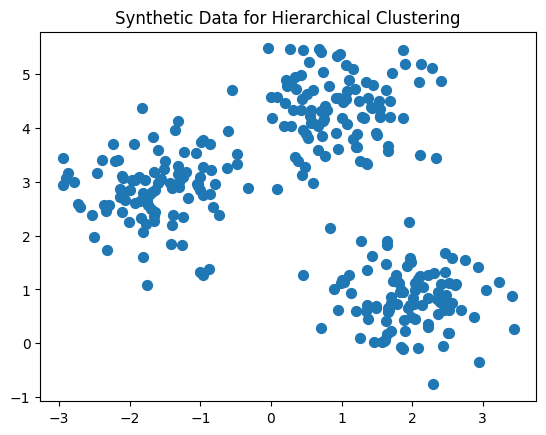

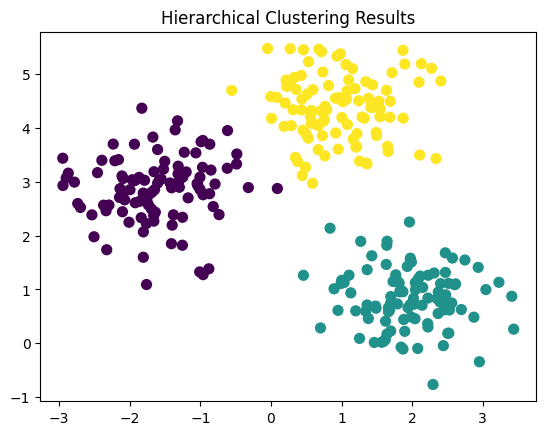

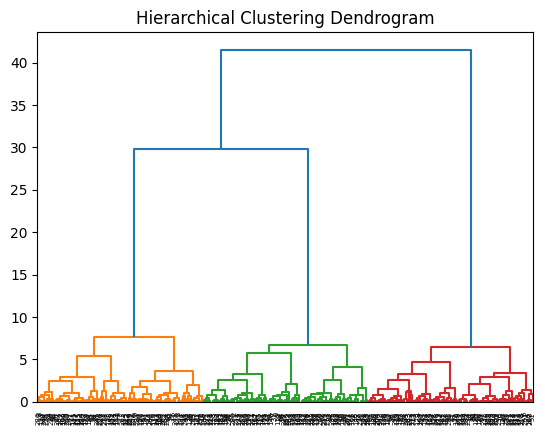

In [ ]:
#6a part1: Hierrchical clustering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data for demonstration
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Synthetic Data for Hierarchical Clustering')
plt.show()

# Perform hierarchical clustering using Agglomerative Clustering
# You can adjust the parameters such as n_clusters, linkage, etc.
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_clustering.fit_predict(X)

# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', s=50)
plt.title('Hierarchical Clustering Results')
plt.show()

# Plot the dendrogram
linked = linkage(X, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()



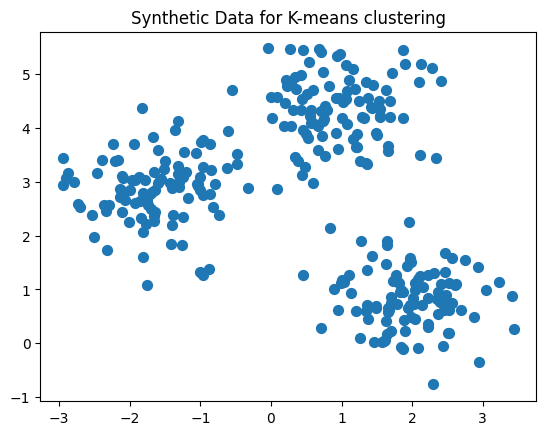

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


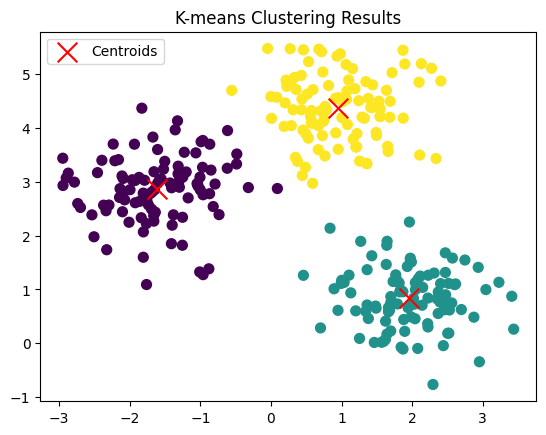

In [ ]:
#6a part2: kmean clustering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples = 300, centers = 3, cluster_std = 0.60, random_state = 0)

plt.scatter(X[:, 0 ], X[:, 1],  s=50)
plt.title('Synthetic Data for K-means clustering')
plt.show()

kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans_labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:,1], c = kmeans_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker = 'x', s = 200, label ='Centroids' )
plt.title('K-means Clustering Results')
plt.legend()
plt.show()

In [ ]:
#6b Apply the clustering algorithm to a set of documents and evaluate the clustering results

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_20newsgroups  # Example dataset

# Load example dataset (replace with your own data loading code)
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups_data.data

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(documents)

# Perform K-means clustering
num_clusters = 5  # Adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=num_clusters, random_state=42,n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Evaluate the clustering results using silhouette score
silhouette_avg = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Print some information about the clusters
for cluster_id in range(num_clusters):
    cluster_samples = np.where(kmeans_labels == cluster_id)[0]
    print(f"\nCluster {cluster_id} ({len(cluster_samples)} documents):")
    for sample_idx in cluster_samples[:min(3, len(cluster_samples))]:
        print(f"   - {documents[sample_idx].strip()}")


Silhouette Score: 0.01

Cluster 0 (3546 documents):
   - My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt
   - Think!

It's the SCSI card doing the DMA transfers NOT the disks...

The SCSI card can do DMA transfers containing data from any of the SCSI devices
it is attached when it wants to.

An important feature of SCSI is the ability to detach a device. This frees the
SCSI bus for other devices. This is typically used in a multi-tasking OS to
start transfers on several devices. While each device is seeking the data the
bus is free for other commands and data transfers. When the devices are
ready to transfer the data they can aquire the bus and send the data.

On an IDE bus when you start a transfer the bus is busy

# PRACTICAL 7 (7a)

In [ ]:
#Practical 7: Web Crawling and Indexing

#7a	Develop a web crawler to fetch and index web pages

import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse, urljoin
from collections import deque

def fetch_url(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.text
    except Exception as e:
        print(f"Error fetching {url}: {e}")
    return None

def extract_links(html, base_url):
    soup = BeautifulSoup(html, 'html.parser')
    links = []
    for link in soup.find_all('a', href=True):
        absolute_url = urljoin(base_url, link['href'])
        links.append(absolute_url)
    return links

def index_page(url, content):
    # Implement your indexing logic here
    pass

def web_crawler(seed_url, max_pages=10):
    visited = set()
    queue = deque([(seed_url, 0)])

    while queue and len(visited) < max_pages:
        current_url, depth = queue.popleft()
        if current_url not in visited:
            print(f"Processing {current_url}")
            html_content = fetch_url(current_url)
            if html_content:
                index_page(current_url, html_content)
                visited.add(current_url)
                if depth < max_pages:
                    links = extract_links(html_content, current_url)
                    queue.extend((link, depth + 1) for link in links)

seed_url = 'https://youtube.com'
web_crawler(seed_url,max_pages=5)


Processing https://youtube.com
Processing https://youtube.com/
Processing https://www.youtube.com/about/
Processing https://www.youtube.com/about/press/
Processing https://www.youtube.com/about/copyright/


# PRACTICAL 8 (8a, 8b)

In [ ]:
#Practical 8: Link Analysis and PageRank

#8a Implement the PageRank algorithm to rank web pages based on link analysis.

vector_dict={"A":[0,1,1,1],"B":[0,0,1,0],"C":[1,0,0,1],"D":[0,0,0,0]}
df=0.85
PageRank={"A":1,"B":1,"C":1,"D":1}
columns={"A":0,"B":1,"C":2,"D":3}

def connections(page):
    column=columns[page]
    incomings=[]
    for i in vector_dict.keys():
        for connections in range(len(vector_dict[i])):
            if connections==column and vector_dict[i][connections]==1:
                incomings.append(i)
    return incomings

def outDegree(node):
    count=0
    for i in vector_dict[node]:
        if i==1:
            count+=1
    return count
for iteration in range(3):
    for i in PageRank.keys():
        factor=0
        incomings_node=connections(i)
        for node in incomings_node:
            factor+=PageRank[node]/outDegree(node)
            PageRank[i]=(1-df)+(df*factor)
        print("PageRank for iteration",iteration ,"is",PageRank[i])


PageRank for iteration 0 is 0.575
PageRank for iteration 0 is 0.3129166666666667
PageRank for iteration 0 is 0.5788958333333334
PageRank for iteration 0 is 0.5589473958333333
PageRank for iteration 1 is 0.3960307291666667
PageRank for iteration 1 is 0.26220870659722223
PageRank for iteration 1 is 0.48508610720486117
PageRank for iteration 1 is 0.46837030215928827
PageRank for iteration 2 is 0.356161595562066
PageRank for iteration 2 is 0.2509124520759187
PageRank for iteration 2 is 0.46418803634044964
PageRank for iteration 2 is 0.4481923675206098


In [ ]:
 #8b Apply page rank algorithm to small web graph and analyze the result

import networkx as nx
web_graph = nx.DiGraph()
web_graph.add_edges_from([
    ('A','B'),
    ('A','C'),
    ('B','A'),
    ('C','A'),
    ('C','B')
    ])

pagerank_scores = nx.pagerank(web_graph)

print("PageRank Scores: ")
for node, score in pagerank_scores.items():
    print(f"{node}: {score: .4F}")

sorted_nodes = sorted(pagerank_scores, key = pagerank_scores.get, reverse = True)
print("\nNodes ranked by PageRank: ")
for node in sorted_nodes:
    print(f"{node}: {pagerank_scores[node]:.4f}")


PageRank Scores: 
A:  0.4327
B:  0.3333
C:  0.2339

Nodes ranked by PageRank: 
A: 0.4327
B: 0.3333
C: 0.2339
